<a href="https://colab.research.google.com/github/Manish-k723/100-days-of-ML/blob/main/Day_57_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

In [4]:
X,y = load_diabetes(return_X_y = True)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_val,y_train, y_val = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_val)

In [13]:
from sklearn.metrics import r2_score, mean_squared_error

r2_score(y_val, y_pred), np.sqrt(mean_squared_error(y_val, y_pred))

(0.4526027629719195, 53.85344583676593)

In [15]:
from sklearn.linear_model import Ridge

In [25]:
def score(n):
  ridge = Ridge(alpha = n)
  ridge.fit(X_train, y_train)
  y_pred = model.predict(X_val)

  print(r2_score(y_val, y_pred), np.sqrt(mean_squared_error(y_val, y_pred)))

In [29]:
score(250)

250
0.4526998154220112 53.84867157029345


In [30]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

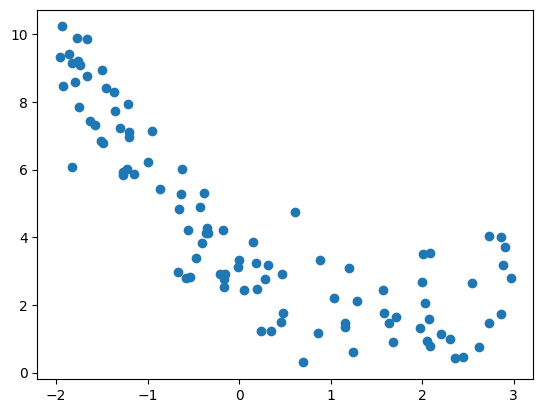

In [31]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.73849e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.60271e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


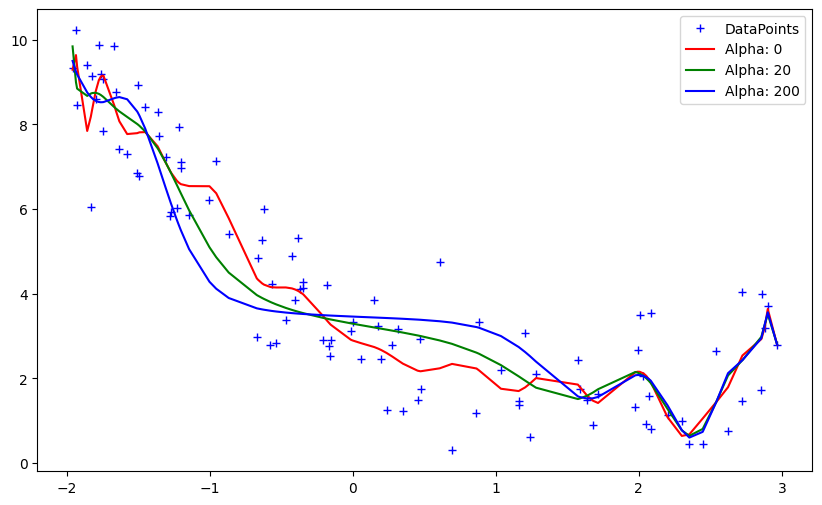

In [41]:
from sklearn.preprocessing import PolynomialFeatures

def get_preds(x1, x2, alpha):
  model = Pipeline([
      ('Poly feats',PolynomialFeatures(degree= 24)),
      ('ridge', Ridge(alpha = alpha))
  ])

  model.fit(x1,x2)
  return model.predict(x1)

alphas = [0,20,200]
cs = ['r','g','b']

plt.figure(figsize = (10, 6))
plt.plot(x1, x2, 'b+', label = 'DataPoints')

for alpha, c in zip(alphas, cs):
  preds = get_preds(x1, x2, alpha)

  plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))
  # print(preds[np.argsort(x1[:, 0])])
  # print(preds)
  # break

plt.legend()